In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# Load the data from CSV
file_path = 'D:/data_analysis/NLP/twitter_sentiment_analysis/extratime.csv'
twitter_data = pd.read_csv(file_path)

# Display the first few lines
print(twitter_data.head())

                                                 URL  \
0  https://twitter.com/idextratime/status/1669493...   
1  https://twitter.com/idextratime/status/1669493...   
2  https://twitter.com/idextratime/status/1669490...   
3  https://twitter.com/idextratime/status/1669489...   
4  https://twitter.com/idextratime/status/1669475...   

                        Date  \
0  2023-06-15 23:55:55+00:00   
1  2023-06-15 23:52:18+00:00   
2  2023-06-15 23:40:34+00:00   
3  2023-06-15 23:39:05+00:00   
4  2023-06-15 22:43:45+00:00   

                                               Tweet                   ID  \
0               Won’t happen against Indonesia, pal.  1669493974829268992   
1                                                 😭🤌  1669493064669487104   
2  Aku akibat bang Messi ga jadi kesini https://t...  1669490108846993408   
3                Lagi stres berat pengen moshing aja  1669489738573832192   
4  BREAKING : Napoli resmi menunjuk eks pelatih A...  1669475809529303040   

   Repl

In [27]:
tweet_text = twitter_data['Tweet']
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in tweet_text:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Won’t', 'happen', 'against', 'Indonesia,', 'pal.', '😭🤌', 'Aku', 'akibat', 'bang', 'Messi', 'ga', 'jadi', 'kesini', 'https://t.co/yr6PQkoJNX', 'Lagi', 'stres', 'berat', 'pengen', 'moshing', 'aja', 'BREAKING', ':', 'Napoli', 'resmi', 'menunjuk', 'eks', 'pelatih', 'Al-Nassr,', 'Rudi', 'Garcia,', 'sebagai', 'pelatih', 'baru', 'mereka.', '👔', '#TransferExtraTime', 'https://t.co/CJCdTDUT8M', '#NationsLeague', 'FT', ':', 'Spanyol', '2-1', 'Italia', '⚽', 'Yeremi', "3'", '⚽', 'Joselu', "88'", '-', '⚽', 'Immobile', "11'", '(P)', 'Spanyol', 'tantang', 'Kroasia', 'di', 'final..', '⚔️', 'https://t.co/dpG2QVlITB', 'She', 'belongs', 'to', 'the', 'street', 'man,', 'Steph', 'ain’t', 'deserve', 'this', 'Aku', 'nonton', 'Argentina', 'pengen', 'lihat', 'langsung', '3', 'pemain', 'yang', 'bikin', 'mereka', 'juara', 'Piala', 'Dunia', 'bang', '👊😎', 'https://t.co/KZLKtqceOQ', 'Osimhen,', 'Kvara', 'mending', 'pindah', 'dari', 'sekarang', 'Knp', 'blum', 'tidur?', '@gunbill', 'Stadium,', 'PI', 'beda', 'lagi', 

In [28]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
# len(lines2)

In [29]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create an instance of the Indonesian stemmer from Sastrawi library
stemmer = StemmerFactory().create_stemmer()

stem = []
for word in lines2:
    stem.append(stemmer.stem(word))
    
stem

['wont',
 'happen',
 'against',
 'indonesia',
 'pal',
 'aku',
 'akibat',
 'bang',
 'messi',
 'ga',
 'jadi',
 'kesini',
 'httpstcoyr6pqkojnx',
 'lagi',
 'stres',
 'berat',
 'ken',
 'moshing',
 'aja',
 'breaking',
 'napoli',
 'resmi',
 'tunjuk',
 'eks',
 'latih',
 'alnassr',
 'rudi',
 'garcia',
 'bagai',
 'latih',
 'baru',
 'mereka',
 'transferextratime',
 'httpstcocjcdtdut8m',
 'nationsleague',
 'ft',
 'spanyol',
 '21',
 'italia',
 'yeremi',
 '3',
 'joselu',
 '88',
 'immobile',
 '11',
 'p',
 'spanyol',
 'tantang',
 'kroasia',
 'di',
 'final',
 'httpstcodpg2qvlitb',
 'she',
 'belongs',
 'to',
 'the',
 'street',
 'man',
 'steph',
 'aint',
 'deserve',
 'this',
 'aku',
 'nonton',
 'argentina',
 'ken',
 'lihat',
 'langsung',
 '3',
 'main',
 'yang',
 'bikin',
 'mereka',
 'juara',
 'piala',
 'dunia',
 'bang',
 'httpstcokzlktqceoq',
 'osimhen',
 'kvara',
 'mending',
 'pindah',
 'dari',
 'sekarang',
 'knp',
 'blum',
 'tidur',
 'gunbill',
 'stadium',
 'pi',
 'beda',
 'lagi',
 'taurunians',
 'tidu

In [30]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['wont',
 'happen',
 'indonesia',
 'pal',
 'aku',
 'akibat',
 'bang',
 'messi',
 'ga',
 'jadi',
 'kesini',
 'httpstcoyr6pqkojnx',
 'lagi',
 'stres',
 'berat',
 'ken',
 'moshing',
 'aja',
 'breaking',
 'napoli',
 'resmi',
 'tunjuk',
 'eks',
 'latih',
 'alnassr',
 'rudi',
 'garcia',
 'bagai',
 'latih',
 'baru',
 'mereka',
 'transferextratime',
 'httpstcocjcdtdut8m',
 'nationsleague',
 'ft',
 'spanyol',
 '21',
 'italia',
 'yeremi',
 '3',
 'joselu',
 '88',
 'immobile',
 '11',
 'p',
 'spanyol',
 'tantang',
 'kroasia',
 'di',
 'final',
 'httpstcodpg2qvlitb',
 'belongs',
 'street',
 'man',
 'steph',
 'aint',
 'deserve',
 'aku',
 'nonton',
 'argentina',
 'ken',
 'lihat',
 'langsung',
 '3',
 'main',
 'yang',
 'bikin',
 'mereka',
 'juara',
 'piala',
 'dunia',
 'bang',
 'httpstcokzlktqceoq',
 'osimhen',
 'kvara',
 'mending',
 'pindah',
 'dari',
 'sekarang',
 'knp',
 'blum',
 'tidur',
 'gunbill',
 'stadium',
 'pi',
 'beda',
 'lagi',
 'taurunians',
 'tidur',
 'carammilo',
 'aku',
 'cuci',
 'kaki',


In [31]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [32]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 9800, 2: 1542, 3: 725, 4: 420, 5: 303, 6: 261, 7: 172, 8: 155, 9: 124, 10: 101, ...})

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


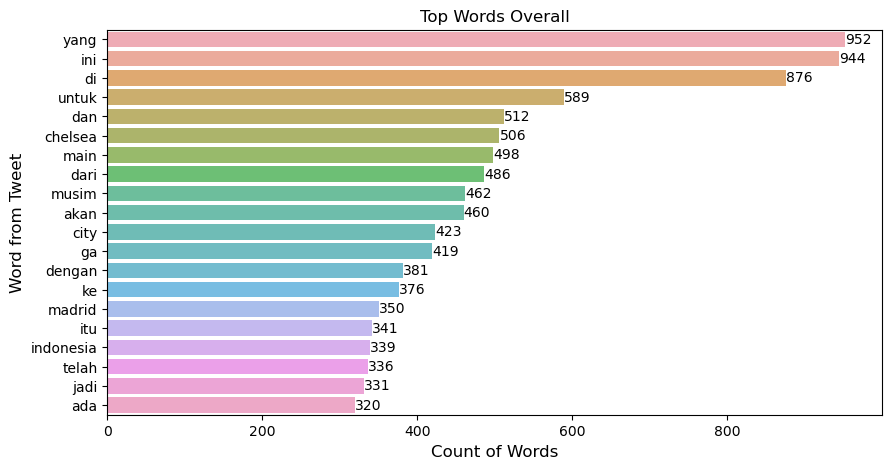

In [34]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
# Add data labels to the bars
for i, value in enumerate(df.values):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=10)
plt.show()

In [35]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [36]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [38]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


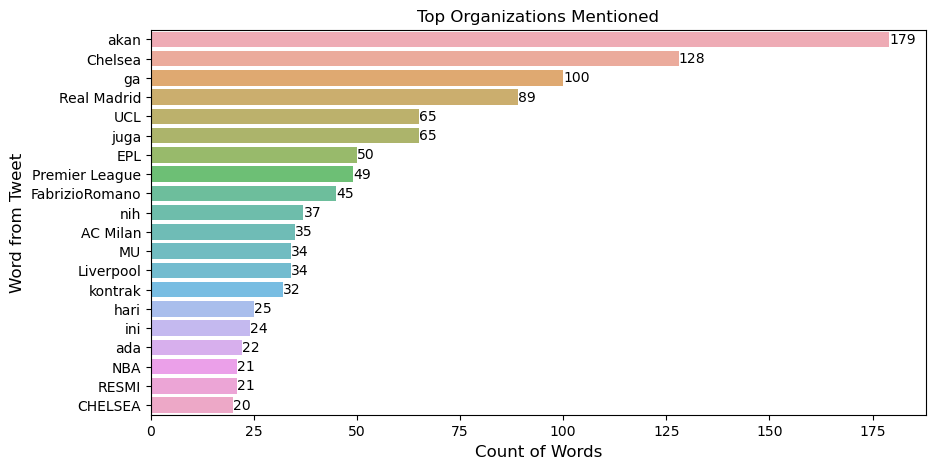

In [39]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
# Add data labels to the bars
for i, value in enumerate(df.values):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=10)
plt.show()

In [40]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


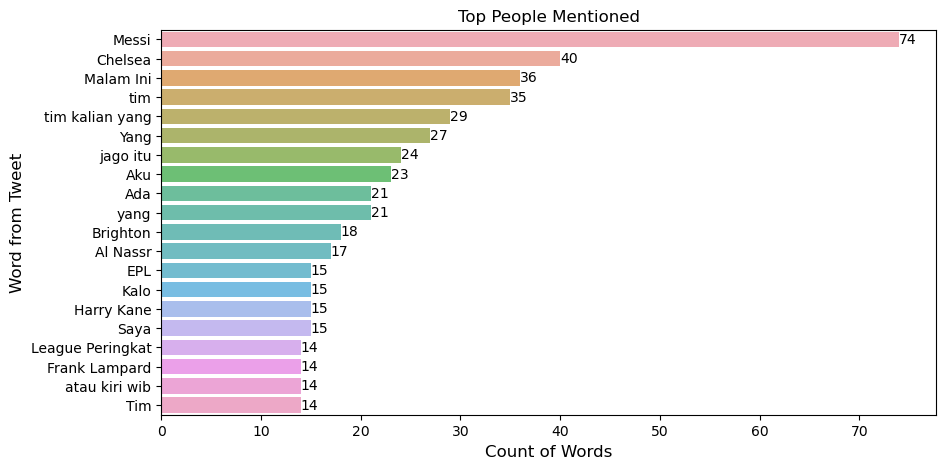

In [41]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
# Add data labels to the bars
for i, value in enumerate(df.values):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=10)
plt.show()